In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
X = pd.read_csv('X_data.csv')
y = pd.read_csv('y_data.csv')

# Display the first few rows of the data to understand its structure
X.head(), y.head()

(   Unnamed: 0   Runtime  Weekly Views   n_score  g_score  ky_chart_on  J-POP  \
 0           0 -5.481164     -1.011884  0.005413   0.0100            0      0   
 1           1 -5.463916     -1.011884  0.005413   0.0100            0      0   
 2           2 -5.498411     -1.011884 -0.003032   0.0006            0      0   
 3           3 -5.478404     -1.011885  0.002105   0.0045            0      0   
 4           4 -5.501171     -1.011884 -0.003032   0.0006            0      0   
 
    Soul  Trot  Pop  ...  K-Pop  Folk  Dance  Traditional  season_autumn  \
 0     0     0    0  ...      1     0      1            0              1   
 1     0     0    0  ...      1     1      0            0              1   
 2     0     0    0  ...      1     0      1            0              1   
 3     0     0    0  ...      1     0      1            0              1   
 4     0     0    0  ...      1     0      1            0              1   
 
    season_spring  season_summer  season_winter  Previ

In [6]:
# Drop the 'Unnamed: 0' column from both datasets as it is not needed for modeling
X = X.drop(columns=['Unnamed: 0'])
y = y.drop(columns=['Unnamed: 0'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
mse, r2


(424.39629723978504, 0.8764251268551465)

In [7]:
import numpy as np

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display RMSE and R²
rmse, r2


(20.60088098212756, 0.8764251268551465)

평균 제곱근 오차 (RMSE): 20.60
결정 계수 (R²): 0.876

In [8]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Define models with default hyperparameters
ridge_model = Ridge()
lasso_model = Lasso()
elastic_model = ElasticNet()

# Train and predict with Ridge model
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# Train and predict with Lasso model
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# Train and predict with ElasticNet model
elastic_model.fit(X_train, y_train)
y_pred_elastic = elastic_model.predict(X_test)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)

# Display results for all models
ridge_results = (rmse_ridge, r2_ridge)
lasso_results = (rmse_lasso, r2_lasso)
elastic_results = (rmse_elastic, r2_elastic)

ridge_results, lasso_results, elastic_results


((20.462268276967254, 0.8780824755100358),
 (21.45278225869226, 0.8659935085242928),
 (51.05656765743795, 0.24096497221236934))

릿지 회귀: 기본 선형 회귀보다 더 나은 성능을 보였으며, 과적합을 잘 방지하고 있습니다.

라쏘 회귀: 중요한 특성을 선택해 모델을 단순화하는 효과가 있지만, 예측 성능은 다소 떨어집니다.

엘라스틱넷: 회귀는 현재 데이터와 기본 설정으로는 성능이 저조하므로, 하이퍼파라미터 튜닝이 필요할 수 있습니다.

* Feature Selection

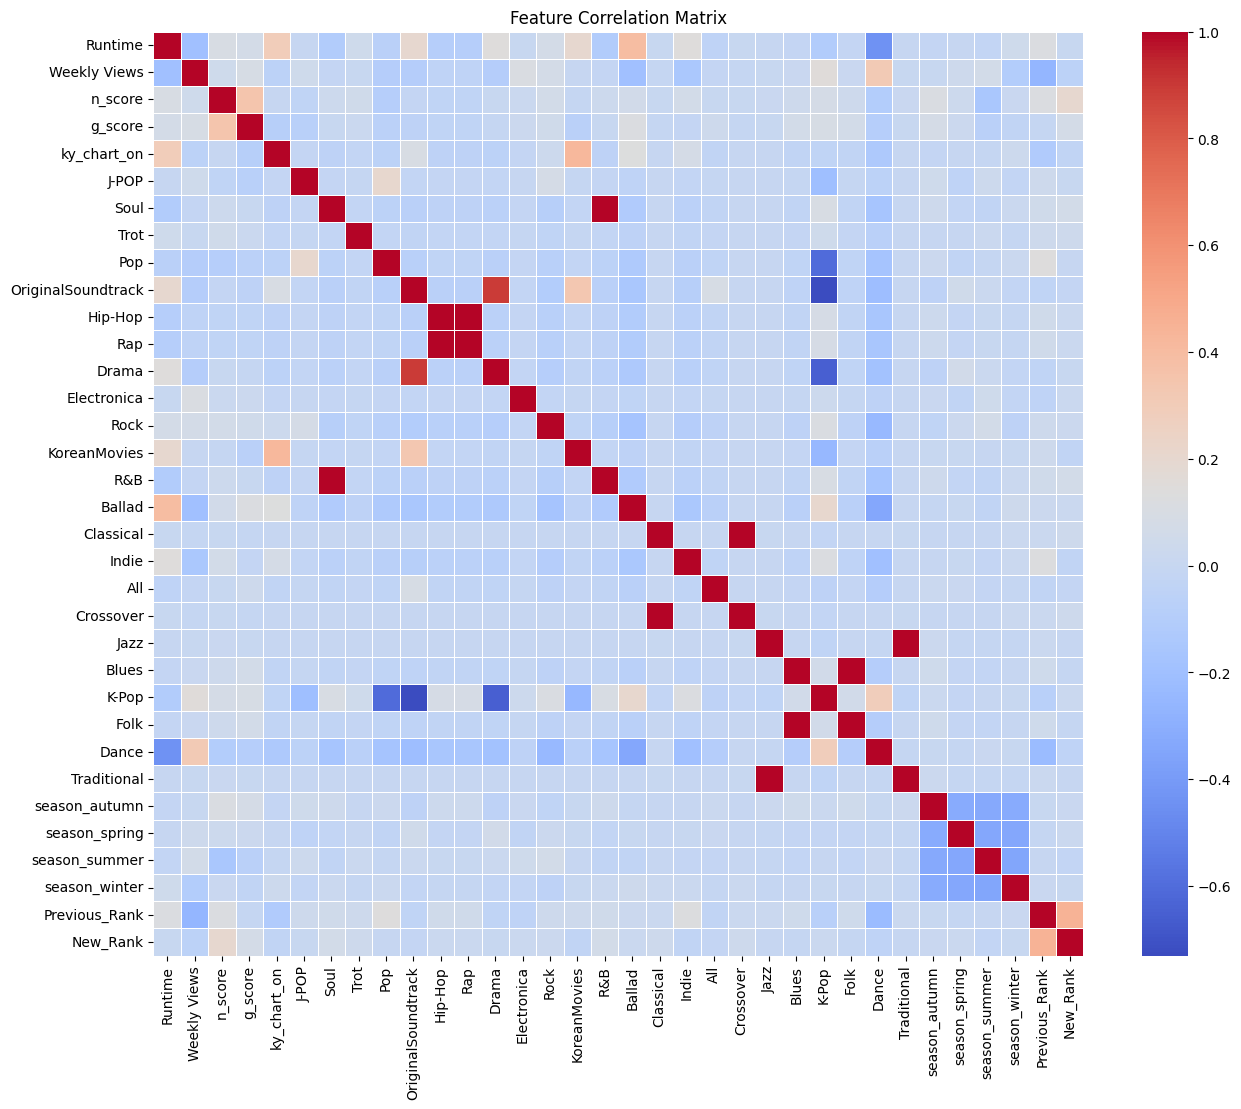

[('Rap', 'Hip-Hop'),
 ('Drama', 'OriginalSoundtrack'),
 ('R&B', 'Soul'),
 ('Crossover', 'Classical'),
 ('Folk', 'Blues'),
 ('Traditional', 'Jazz')]

In [9]:
import seaborn as sns
import numpy as np

# Calculate correlation matrix
correlation_matrix = X.corr()

# Plot correlation matrix to visualize the relationships between features
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Identify features with high correlation (threshold > 0.8)
high_corr_pairs = []

threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Display highly correlated feature pairs
high_corr_pairs


상관계수가 높은 특성 쌍들은 다음과 같습니다:

Rap과 Hip-Hop
Drama와 OriginalSoundtrack
R&B와 Soul
Crossover와 Classical
Folk와 Blues
Traditional과 Jazz

이러한 특성 쌍들은 상관계수가 0.8을 초과하여 높은 상관관계를 가지고 있으므로, 다중공선성을 피하기 위해 한쪽 특성을 제거하는 것이 좋습니다.

In [10]:
# Combine highly correlated features using logical OR operation to maintain one-hot encoding (resulting in 1 or 0)
X['Rap_HipHop'] = np.where((X['Rap'] + X['Hip-Hop']) > 0, 1, 0)
X['Drama_OST'] = np.where((X['Drama'] + X['OriginalSoundtrack']) > 0, 1, 0)
X['RnB_Soul'] = np.where((X['R&B'] + X['Soul']) > 0, 1, 0)
X['Crossover_Classical'] = np.where((X['Crossover'] + X['Classical']) > 0, 1, 0)
X['Folk_Blues'] = np.where((X['Folk'] + X['Blues']) > 0, 1, 0)
X['Traditional_Jazz'] = np.where((X['Traditional'] + X['Jazz']) > 0, 1, 0)

# Drop the original features that were combined
X = X.drop(columns=['Rap', 'Hip-Hop', 'Drama', 'OriginalSoundtrack', 'R&B', 'Soul', 
                    'Crossover', 'Classical', 'Folk', 'Blues', 'Traditional', 'Jazz'])

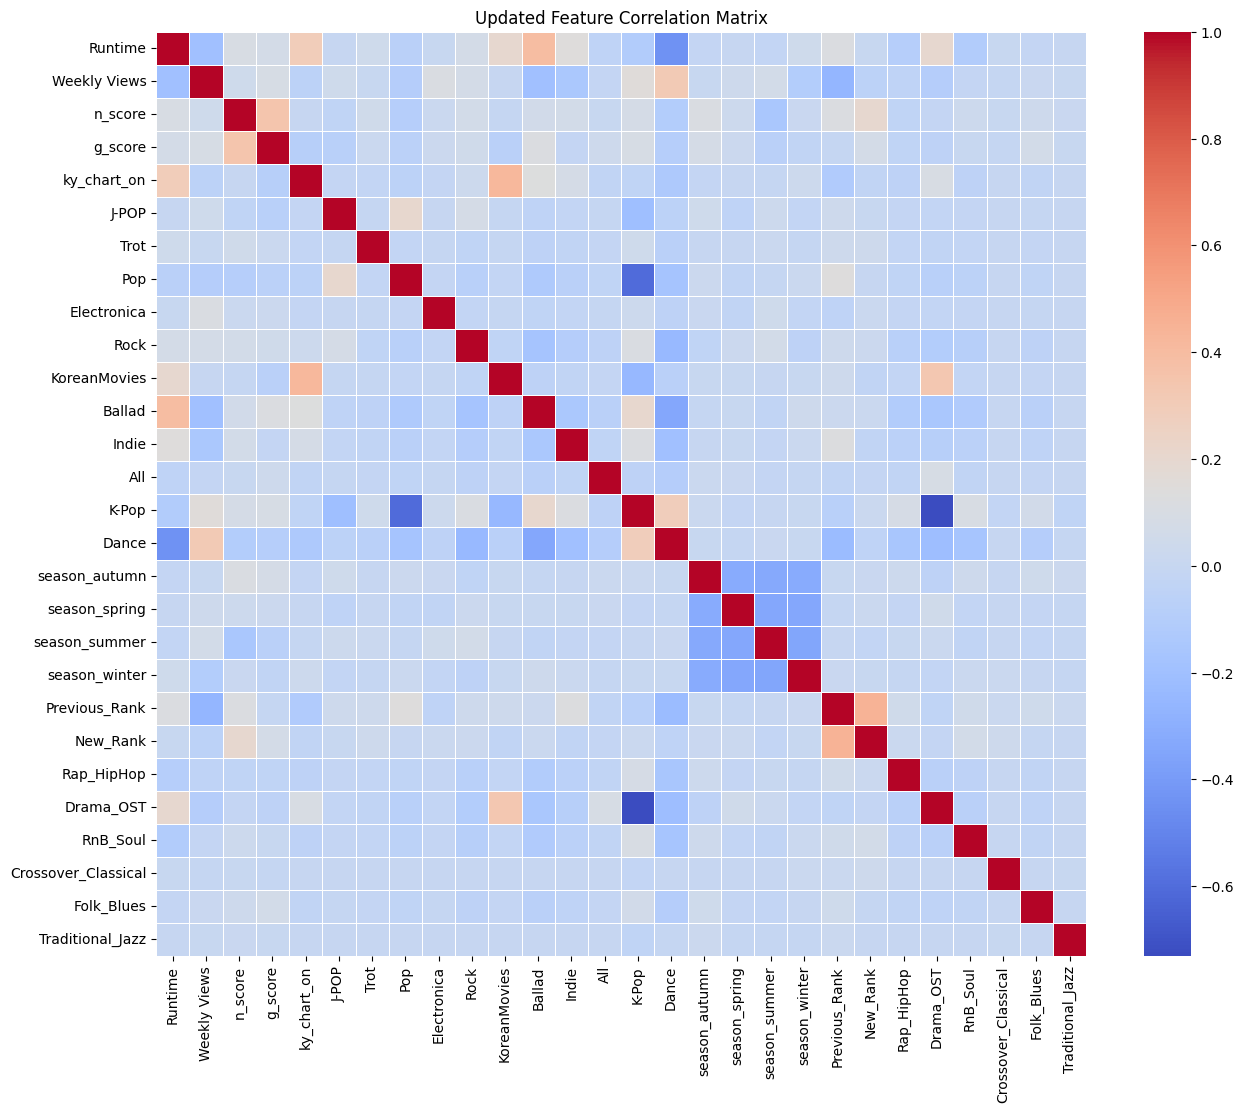

[]

In [11]:
# Recalculate the correlation matrix for the updated feature set
correlation_matrix_updated = X.corr()

# Plot correlation matrix to visualize the relationships between the updated features
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_updated, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Updated Feature Correlation Matrix')
plt.show()

# Identify features with high correlation (threshold > 0.8) for the updated feature set
high_corr_pairs_updated = []

threshold = 0.8
for i in range(len(correlation_matrix_updated.columns)):
    for j in range(i):
        if abs(correlation_matrix_updated.iloc[i, j]) > threshold:
            high_corr_pairs_updated.append((correlation_matrix_updated.columns[i], correlation_matrix_updated.columns[j]))

# Display highly correlated feature pairs for the updated feature set
high_corr_pairs_updated

업데이트된 특성 집합에서 상관계수가 0.8을 초과하는 높은 상관관계를 가진 특성 쌍이 없습니다. 이는 이전에 상관관계가 높았던 특성들을 결합한 덕분에, 다중공선성이 줄어든 것을 의미합니다.

* Feature Transformation

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the feature set
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [13]:
X_scaled.head()

,Runtime,Weekly Views,n_score,g_score,ky_chart_on,J-POP,Trot,Pop,Electronica,Rock,...,season_summer,season_winter,Previous_Rank,New_Rank,Rap_HipHop,Drama_OST,RnB_Soul,Crossover_Classical,Folk_Blues,Traditional_Jazz
0,-0.733963,2.119452,2.386856,3.036499,-0.22091,-0.08644,-0.099764,-0.252514,-0.076319,-0.34685,...,-0.591156,-0.583803,-1.671827,-0.270043,-0.226419,-0.304061,-0.234968,-0.01008,-0.143647,-0.014256
1,-0.077307,2.119452,2.386856,3.036499,-0.22091,-0.08644,-0.099764,-0.252514,-0.076319,-0.34685,...,-0.591156,-0.583803,-1.638479,-0.270043,-0.226419,-0.304061,-0.234968,-0.01008,6.961488,-0.014256
2,-1.390619,2.047278,-1.194090,-0.909744,-0.22091,-0.08644,-0.099764,-0.252514,-0.076319,-0.34685,...,-0.591156,-0.583803,-1.621805,-0.270043,-0.226419,-0.304061,-0.234968,-0.01008,-0.143647,-0.014256
3,-0.628898,0.083618,0.984208,0.727527,-0.22091,-0.08644,-0.099764,-0.252514,-0.076319,-0.34685,...,-0.591156,-0.583803,-1.588457,-0.270043,-0.226419,-0.304061,-0.234968,-0.01008,-0.143647,-0.014256
4,-1.495684,2.047278,-1.194090,-0.909744,-0.22091,-0.08644,-0.099764,-0.252514,-0.076319,-0.34685,...,-0.591156,-0.583803,-1.605131,-0.270043,-0.226419,-0.304061,-0.234968,-0.01008,-0.143647,-0.014256


In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

In [15]:
# Identify categorical features (those that are binary encoded, i.e., contain only 0 or 1)
categorical_features = [col for col in X.columns if X[col].nunique() == 2]

# Identify numerical features (those that are not categorical)
numerical_features = [col for col in X.columns if col not in categorical_features]

# Apply standardization only to numerical features
X_scaled_partial = X.copy()
X_scaled_partial[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the scaled data into training and testing sets
X_train_scaled_partial, X_test_scaled_partial, y_train, y_test = train_test_split(X_scaled_partial, y, test_size=0.2, random_state=42)

# Train the Ridge regression model again using the partially standardized features
ridge_model.fit(X_train_scaled_partial, y_train)
y_pred_ridge_scaled_partial = ridge_model.predict(X_test_scaled_partial)

# Calculate RMSE and R² for the Ridge model with partially standardized features
rmse_ridge_scaled_partial = np.sqrt(mean_squared_error(y_test, y_pred_ridge_scaled_partial))
r2_ridge_scaled_partial = r2_score(y_test, y_pred_ridge_scaled_partial)

# Display the updated results after partial standardization
rmse_ridge_scaled_partial, r2_ridge_scaled_partial


(19.94524506967114, 0.8815458921346351)

Feature Engineering

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree 2) for numerical features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Generate polynomial features for the numerical columns
numerical_data = X_scaled_partial[numerical_features]
numerical_poly = poly.fit_transform(numerical_data)

# Get feature names for polynomial features
poly_feature_names = poly.get_feature_names_out(numerical_features)

# Create a DataFrame for the new polynomial features
numerical_poly_df = pd.DataFrame(numerical_poly, columns=poly_feature_names)

# Combine the original categorical features with the new polynomial features
X_feature_engineered = pd.concat([X_scaled_partial[categorical_features].reset_index(drop=True), numerical_poly_df], axis=1)

# Split the new feature set into training and testing sets
X_train_fe, X_test_fe, y_train, y_test = train_test_split(X_feature_engineered, y, test_size=0.2, random_state=42)

# Train the Ridge regression model using the new feature set
ridge_model.fit(X_train_fe, y_train)
y_pred_ridge_fe = ridge_model.predict(X_test_fe)

# Calculate RMSE and R² for the Ridge model with feature engineered data
rmse_ridge_fe = np.sqrt(mean_squared_error(y_test, y_pred_ridge_fe))
r2_ridge_fe = r2_score(y_test, y_pred_ridge_fe)

# Display the updated results after feature engineering
rmse_ridge_fe, r2_ridge_fe


(19.379778191169056, 0.8881672571877782)

RMSE: 19.38 (이전보다 감소)
R²: 0.888 (이전보다 증가)

특성 선택 기법 : Recursive Feature Elimination (RFE)

In [17]:
from sklearn.feature_selection import RFE

# Initialize the Ridge model for RFE
ridge_for_rfe = Ridge()

# Set up RFE to select the top N features (let's start with 10 features for simplicity)
rfe = RFE(estimator=ridge_for_rfe, n_features_to_select=10)

# Fit RFE on the training data
rfe.fit(X_train_fe, y_train)

# Get the selected features
selected_features = X_train_fe.columns[rfe.support_]

# Create a new dataset with only the selected features
X_train_selected = X_train_fe[selected_features]
X_test_selected = X_test_fe[selected_features]

# Train the Ridge regression model again using the selected features
ridge_model.fit(X_train_selected, y_train)
y_pred_ridge_selected = ridge_model.predict(X_test_selected)

# Calculate RMSE and R² for the Ridge model with selected features
rmse_ridge_selected = np.sqrt(mean_squared_error(y_test, y_pred_ridge_selected))
r2_ridge_selected = r2_score(y_test, y_pred_ridge_selected)

# Display the updated results after feature selection
selected_features, rmse_ridge_selected, r2_ridge_selected


(Index(['Trot', 'Electronica', 'New_Rank', 'RnB_Soul', 'Folk_Blues',
        'Traditional_Jazz', 'Weekly Views', 'Previous_Rank', 'Runtime n_score',
        'n_score Previous_Rank'],
       dtype='object'),
 19.601867272717286,
 0.8855894006304211)

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for alpha (regularization strength)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 50, 100, 200, 500]}

# Set up the Ridge model
ridge = Ridge()

# Set up GridSearchCV to find the best alpha value
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search on the entire training set with all features
grid_search.fit(X_train_fe, y_train)

# Get the best parameters and the corresponding score
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

# Train the Ridge model again using the best alpha value
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_fe, y_train)
y_pred_ridge_best = ridge_best.predict(X_test_fe)

# Calculate RMSE and R² for the Ridge model with the best alpha
rmse_ridge_best = np.sqrt(mean_squared_error(y_test, y_pred_ridge_best))
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)

# Display the results after hyperparameter tuning
best_alpha, best_score, rmse_ridge_best, r2_ridge_best


(1, 0.8667181253193468, 19.379778191169056, 0.8881672571877782)